
# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

we have  dataset  that represents information about the patient's medical appointments in Brazil and we have more than Column and 100K record, which is useful in analysing the data to determine who affects the patient's presence and non-attendance.

can be found  dataset  here: https://www.kaggle.com/joniarroba/noshowappointments/home

# Import packages

In [1]:
# Use this cell to set up import statements for all of the packages that you

import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

 here we will load data and exploration it . so, check if have any missing values or duplicates , not correct any value. After extracting these problems, we will clean the data. 

### General Properties

# read and load the dataset

In [2]:
# read data set 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head() 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# konw someinformation about data
df.info()
# no have any missing value 
df.isnull().any()
# to know how many missing data for each column
df.isnull().sum()
# no have any row duplicated 
df.duplicated()
sum(df.duplicated())

# to know how many sample in this data
# we have 110527 row and 14 column
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

### Data Cleaning (convert from object to datetime)

In [4]:
#  here I  fix data by convert from object to datetime by function to_datetime from pandas Library
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# to ensure the convert is done
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### Data Cleaning (convert PatientId from Float to int )

In [5]:
# it's more correct for id type data as int 
df['PatientId']= df['PatientId'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### Data Cleaning (Remove outliers from Age)

(-1, 115)

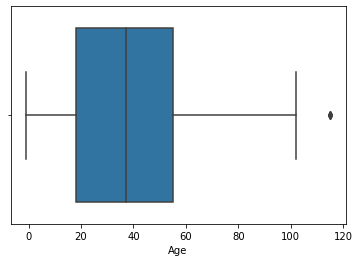

In [6]:
# fix age to the correct data 

df['Age'].describe
# I used funcation boxplot to detect if have outliers from library seaborn to show which value not in range like age (-1 ) / resource from this link :https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
sns.boxplot(x=df['Age'])
# here we have not real data about age the min is -1 
df['Age'].min() , df['Age'].max()

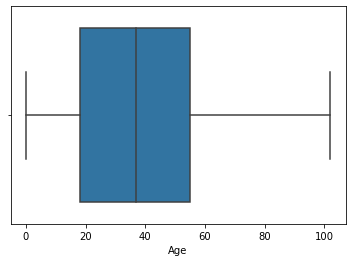

In [7]:

# I assumed that the normal age was from 1 months to 110 years . Also, the outliers dosen't effect on data  when it is deleted
# fix to select just data have age greater than or equal 0  and included value 0 maybe  it contains baby in months
df2 = df[df['Age'] >= 0 ]  
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]
df2['Age'].value_counts()
sns.boxplot(x=df['Age'])

### Data Cleaning (rename the column)

In [8]:
# here rename the column  to be correct from 'No-show'  to 'No_show', because the complier not show all name just NO 
df2.rename(columns={'No-show' : 'No_show'}, inplace = True)


In [ ]:
df2.info()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Most of the appointments booked are of any gender?

This bar chart depicts female greater than man in appimoment, where 0 represents female(F) and 1 erpresents men (M)


Text(0, 0.5, 'Patient')

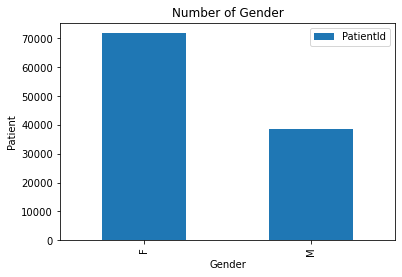

In [21]:
# which gender are most reserved  medical appointments?

# here use groupby to know count of  Patients  ara  Famele or male 
df_Gender = df2.groupby([ 'Gender'] ,as_index = False )['PatientId'].count().plot.bar()
df_Gender.set_xticklabels(['F' , 'M'])

df2_g= df2.groupby([ 'Gender'] ,as_index = False )['PatientId'].count()

plt.title('Number of Gender')
plt.xlabel('Gender')
plt.ylabel('Patient')


### Research Question 2 :which Gender are most committee by attending their appointment?

I know which gander are  showed up, they are equal in relation to their number through histogram chart but, as for the number of women is greater, therefore the number of attendees will be women large percent

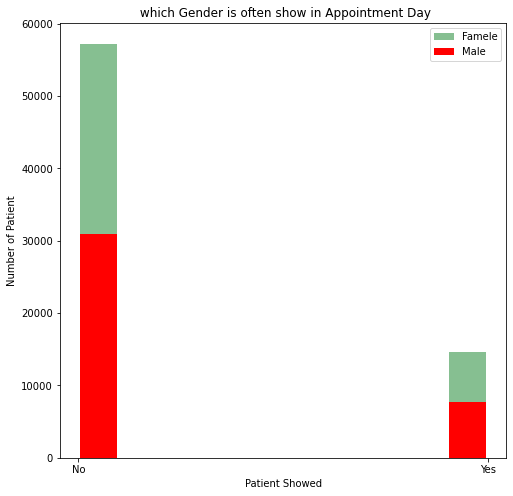

In [22]:
#here split data two group F/M then
#the blue color for famele and orange for man 

df_m = df2.query ('Gender == "M"')
df_f= df2.query ('Gender == "F" ')

df_m['Gender'].value_counts() # male 38687 35% 
df_f['Gender'].value_counts() # famele 71839  65% 

df_f['No_show'].hist( bins=10, grid=False, figsize=(8,8), color='#86bf91', zorder=2, rwidth=0.9 , label = 'Famele')
df_m['No_show'].hist( bins=10, grid=False, figsize=(8,8), color='r', zorder=2, rwidth=0.9 , label = 'Male')

plt.title(' which Gender is often show in Appointment Day')
plt.xlabel('Patient Showed')
plt.ylabel('Number of Patient')
plt.legend()



### Research Question 3 : Dose scholarship make people more commitment to the appointment?

frist step I would know how many patient have Scholarship and the chart depicts a few number have scholarship of 0.98% percentage.
then knowing relationship between Scholarship and attendance , after analyzing and discovering through bar chart we find out that most of who are attended don’t have a scholarship so, it doesn’t effect in anything.

(110526, 14)

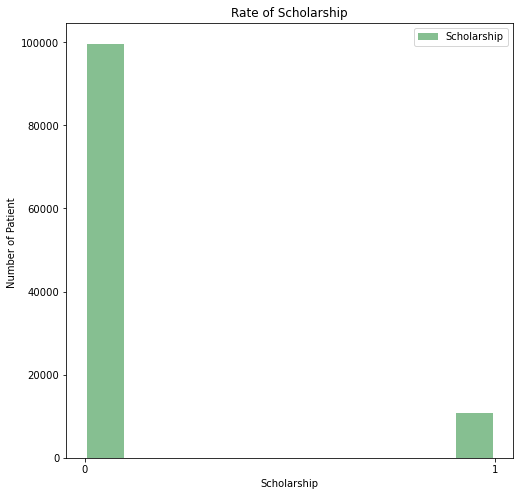

In [23]:

# know how many pationts have Scholarship 

df2['Scholarship'].hist( bins=10, grid=False, figsize=(8,8), color='#86bf91', zorder=2, rwidth=0.9 , label = 'Scholarship' )
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Rate of Scholarship')

plt.xlabel('Scholarship')
plt.ylabel('Number of Patient ');

plt.legend()

# here split data to two data depend on have Scholarship or no 
Scholarship_No =df2.query('Scholarship == 0')
Scholarship_Yes =df2.query('Scholarship == 1')
Scholarship_Yes['Scholarship'].value_counts() # 1086
Scholarship_No['Scholarship'].value_counts() # 99665
df2.shape

No     88207
Yes    22319
Name: No_show, dtype: int64

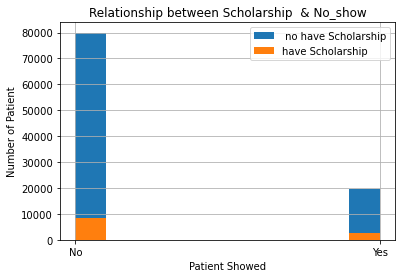

In [24]:
#  here to solve Q3 
# destibetion between No_show and Scholarship 
Scholarship_No['No_show'].hist( label = ' no have Scholarship' )
Scholarship_Yes['No_show'].hist( label = 'have Scholarship' )
plt.title('Relationship between Scholarship  & No_show')
plt.xlabel('Patient Showed')
plt.ylabel('Number of Patient');
plt.legend()

df2['No_show'].value_counts()

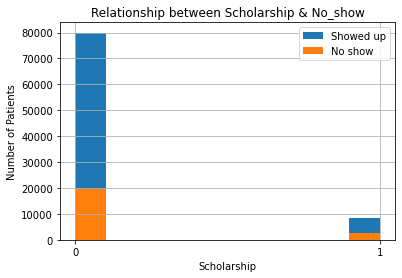

In [25]:

df_No = df2.query ("No_show == 'No'")#88207
#  yes if not show
df_Yes = df2.query ("No_show == 'Yes'") # 22319

df_No['Scholarship'].hist(label = 'Showed up' )#88207
df_Yes['Scholarship'].hist(label = 'No show' ) # 22319
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Relationship between Scholarship & No_show')
plt.xlabel('Scholarship')
plt.ylabel('Number of Patients')
plt.legend()


### Research Question 4 : Did most people who attend apointment received  SMS message?

to answer this I raised another qusestion: Are only patient who receive sms who are attende fot the appointment ? 
this chart and groupby depctis :
29% They attended and the SMS message recived
56% They didn't attend and a message did not reach them
44% Didn't attend and the SMS message recived
70% They attended and  the SMS message didn't recived. 

this show that the SMS message not an influencing factor because a large percentage of those who attended did not receive a message


In [26]:
df2.groupby('SMS_received')['No_show'].value_counts()
# 

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

Text(0, 0.5, 'Number of Patients')

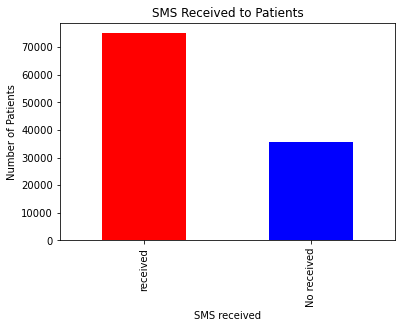

In [27]:
# number who reccive SMS
SMS= df2['SMS_received'].value_counts().plot.bar( color = ('r' , 'b'))
SMS.set_xticklabels(['received' , 'No received'])
plt.title('SMS Received to Patients')
plt.xlabel('SMS received')
plt.ylabel('Number of Patients')


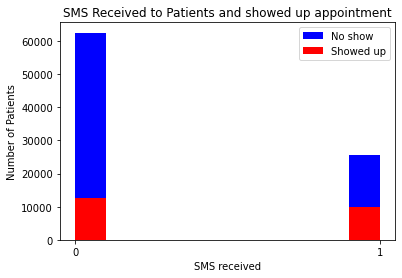

In [28]:
# here 0 represent no recived any SMS message and 1 recived SMS message

df_No['SMS_received'].plot.hist(color='b', label = 'No show ')#88207
df_Yes['SMS_received'].plot.hist(color='r' , label = 'Showed up'  )
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('SMS Received to Patients and showed up appointment')
plt.xlabel('SMS received')
plt.ylabel('Number of Patients')
plt.legend()
# 0 = No
# 1 = Yes

<a id='conclusions'></a>
## Conclusions

To know what's the factors that help the patients to attend their appointments, there are some exist factors are analyzed.


-where as the first question specialized for gender whats is the most frequent type of genders are reserved an appointment. the  Analysis shows women are the more frequent than men by 65% while men 35% So, what we want to know who's the more attend in there appointment men or women but the graph and analysis shows gender doesn’t effect on attendance.

-Then I want to know which patient have the Scholarship, the histogram obtain there are 90% don’t have scholarship while 0.98% only whose have it which is a very little number
Dose the Scholarship effect on patients to come in their appointment or not?
After analyzing and discovering through bar chart we find out that most of who are attended don’t have a scholarship so, it doesn’t effect in anything.

-I want to check for receiving the SMS appointment remainder to patient, to find there is 70% are attend without any SMS remainder so, the SMS isn’t effected.


Finally through the data analysis above there are three factors in data out that so  don't affect  a lot on patient attendance of the appointment or not, but it is expected that the effect will be the difference between the appointment scheduling and the date of the appointment time.


### Limitation 

In this data have one limitation may effect in analysis
-	 I have outliers in age like : -1 and above 110 may affect of  analysis data because it has been deleted 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])